In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns


## Préparation des données pour le projet

* [importation et visualisation des données](#1)
* [Vérification et traitement des données](#2)
* [Jointure pour Dataframe Final](#3)
* [traitement du df_final](#4)

### Importation et visualisation des données<a id='1'></a>

In [2]:
dispo_alimentaire_2017= pd.read_csv('Openclassrooms/Projet 9/data/DisponibiliteAlimentaire_2017.csv')
population= pd.read_csv('Openclassrooms/Projet 9/data/Population_2000_2018.csv')
pib= pd.read_csv('Openclassrooms/Projet 9/data/pib_2015_2016_2017.csv')
stabilite_politique= pd.read_csv('Openclassrooms/Projet 9/data/FAOSTAT_data_fr_stabilite_politique.csv')


In [3]:
population.head(3)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN


In [4]:
dispo_alimentaire_2017.head(3)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées


In [5]:
pib.head(3)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2015,2015,USD,554.004007,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,4,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2015,2015,%,-4.107017,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2016,2016,USD,526.164709,X,Ciffre de sources internationales,NaN


In [6]:
stabilite_politique.head(3)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-2.80,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-0.28,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,8,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,0.38,X,Ciffre de sources internationales,NaN


### Vérification et traitement des données<a id='2'></a>

In [7]:
print(('population',population.shape),('dispo_alimentaire_2017',dispo_alimentaire_2017.shape),('pib',pib.shape),('stabilite_politique',stabilite_politique.shape))

('population', (4411, 15)) ('dispo_alimentaire_2017', (176600, 14)) ('pib', (1266, 15)) ('stabilite_politique', (196, 15))


#### <span style="color: #26B260"> Disponibilités alimentaire</span>

In [8]:
#création d'un DF dispo alimentaire 2017 filtré sur production et importation. Puis sur le produit viande de volaille
df_dispo_alim=dispo_alimentaire_2017.loc[dispo_alimentaire_2017['Élément'].isin(['Importations - Quantité','Production'])]
df_dispo_alimentaire_volaille=df_dispo_alim.loc[df_dispo_alim['Produit']=='Viande de Volailles']
df_dispo_alimentaire_volaille.head(3)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées
1704,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,1667.0,S,Données standardisées


In [9]:
#Vérification des valeurs manquantes
print(df_dispo_alimentaire_volaille.isnull().sum())

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64


In [10]:
#Vérification des valeurs vides
df_dispo_alimentaire_volaille.loc[df_dispo_alimentaire_volaille['Valeur']=='']

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole


In [11]:
#Simplification du dataframe disponibilité alimentaire
dispo_alimentaire_volaille_2017=df_dispo_alimentaire_volaille.pivot_table(values='Valeur', index=['Zone',], columns='Élément')
dispo_alimentaire_volaille_2017.rename(columns= {'Importations - Quantité':'Importations Volaille Qté','Production':'Production Volaille Qté'},inplace=True)
dispo_alimentaire_volaille_2017.head()

Élément,Importations Volaille Qté,Production Volaille Qté
Zone,,
Afghanistan,29.0,28.0
Afrique du Sud,514.0,1667.0
Albanie,38.0,13.0
Algérie,2.0,275.0
Allemagne,842.0,1514.0


#### <span style="color: #26B260"> Population</span>

In [12]:
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [13]:
population['evolution population 2015-2017'] = ((population['Valeur'].diff(2)/population['Valeur'].shift(2))*100).round(2)

population_temp1 = population.loc[(population['Année'] >= 2015) & (population['Année'] <= 2017)]

population_temp2 = population_temp1.loc[(population_temp1["Année"] == 2017)]
population_temp2.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note,evolution population 2015-2017
17,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN,5.47
36,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN,2.93
55,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,2884.169,X,Sources internationales sûres,NaN,-0.22
74,OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,41389.189,X,Sources internationales sûres,NaN,4.18
93,OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,82658.409,X,Sources internationales sûres,NaN,1.06


In [14]:
#population2017=population.loc[population['Année']==2017]
#population2017.head(3)


In [15]:
population_temp2.rename(columns={'Valeur':'population en milliers'}, inplace=True)


/var/folders/fw/lx3b8s7d2fb4dpswcgp2dc6w0000gn/T/ipykernel_78896/1181559104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_temp2.rename(columns={'Valeur':'population en milliers'}, inplace=True)


In [16]:
#Vérification des valeurs manquantes
print(population_temp2.isnull().sum())


Code Domaine                        0
Domaine                             0
Code zone                           0
Zone                                0
Code Élément                        0
Élément                             0
Code Produit                        0
Produit                             0
Code année                          0
Année                               0
Unité                               0
population en milliers              0
Symbole                             0
Description du Symbole              0
Note                              235
evolution population 2015-2017      0
dtype: int64


In [17]:
#Vérification des valeurs vides
population_temp2.loc[population_temp2['population en milliers']=='']


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,population en milliers,Symbole,Description du Symbole,Note,evolution population 2015-2017


In [18]:
#Simplification du dataframe population 
population_temp3=population_temp2.drop(columns=['Code Domaine','Domaine','Code zone','Code Élément','Élément','Code Produit','Produit','Code année','Unité','Symbole','Description du Symbole','Note'])
population_temp3.head()

,Zone,Année,population en milliers,evolution population 2015-2017
17,Afghanistan,2017,36296.113,5.47
36,Afrique du Sud,2017,57009.756,2.93
55,Albanie,2017,2884.169,-0.22
74,Algérie,2017,41389.189,4.18
93,Allemagne,2017,82658.409,1.06


#### <span style="color: #26B260"> PIB</span>

In [19]:
#Vérification des valeurs manquantes
print(pib.isnull().sum())

Code Domaine                 0
Domaine                      0
Code zone (M49)              0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      1266
dtype: int64


In [20]:
#Vérification des valeurs vides
pib.loc[pib['Valeur']=='']

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note


In [21]:
#Simplification du dataframe PIB
evolution_pib=pib.copy()
evolution_pib1=evolution_pib.drop(columns=['Code Domaine','Domaine','Code Élément','Code Produit','Produit','Code année','Symbole','Description du Symbole','Note'])

In [22]:
evolution_pib_temporaire=evolution_pib1.loc[evolution_pib1['Élément']=='Valeur US $ par habitant']
evolution_pib_temporaire.head()

,Code zone (M49),Zone,Élément,Année,Unité,Valeur
0,4,Afghanistan,Valeur US $ par habitant,2015,USD,554.004007
2,4,Afghanistan,Valeur US $ par habitant,2016,USD,526.164709
4,4,Afghanistan,Valeur US $ par habitant,2017,USD,534.020133
6,710,Afrique du Sud,Valeur US $ par habitant,2015,USD,6200.927055
8,710,Afrique du Sud,Valeur US $ par habitant,2016,USD,5734.750635


In [23]:
#Calcul de l'évolution du PIB par pays (entre 2015 et 2017)
evolution_pib_temporaire['evolution pib 2015-2017'] = ((evolution_pib_temporaire['Valeur'].diff(2)/evolution_pib_temporaire['Valeur'].shift(2))*100).round(2)

evolution_pib_temporaire2 = evolution_pib_temporaire.loc[(evolution_pib_temporaire['Année'] >= 2015) & (evolution_pib_temporaire['Année'] <= 2017)]

evolution_pib_temporaire3 = evolution_pib_temporaire2.loc[(evolution_pib_temporaire2["Année"] == 2017)]
evolution_pib_temporaire3.head()

/var/folders/fw/lx3b8s7d2fb4dpswcgp2dc6w0000gn/T/ipykernel_78896/941905171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evolution_pib_temporaire['evolution pib 2015-2017'] = ((evolution_pib_temporaire['Valeur'].diff(2)/evolution_pib_temporaire['Valeur'].shift(2))*100).round(2)


,Code zone (M49),Zone,Élément,Année,Unité,Valeur,evolution pib 2015-2017
4,4,Afghanistan,Valeur US $ par habitant,2017,USD,534.020133,-3.61
10,710,Afrique du Sud,Valeur US $ par habitant,2017,USD,6723.928582,8.43
16,8,Albanie,Valeur US $ par habitant,2017,USD,4521.752217,14.46
22,12,Algérie,Valeur US $ par habitant,2017,USD,4134.936055,-1.49
28,276,Allemagne,Valeur US $ par habitant,2017,USD,44670.222282,9.24


In [24]:
#renommer la colonne Valeur par Valeur PIB
evolution_pib_temporaire3.rename(columns={'Valeur':'Valeur PIB USD'}, inplace=True)
evolution_pib_temporaire3.head()

/var/folders/fw/lx3b8s7d2fb4dpswcgp2dc6w0000gn/T/ipykernel_78896/4173388970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evolution_pib_temporaire3.rename(columns={'Valeur':'Valeur PIB USD'}, inplace=True)


,Code zone (M49),Zone,Élément,Année,Unité,Valeur PIB USD,evolution pib 2015-2017
4,4,Afghanistan,Valeur US $ par habitant,2017,USD,534.020133,-3.61
10,710,Afrique du Sud,Valeur US $ par habitant,2017,USD,6723.928582,8.43
16,8,Albanie,Valeur US $ par habitant,2017,USD,4521.752217,14.46
22,12,Algérie,Valeur US $ par habitant,2017,USD,4134.936055,-1.49
28,276,Allemagne,Valeur US $ par habitant,2017,USD,44670.222282,9.24


In [25]:
#Simplification du dataframe PIB
evolution_pib_temporaire4=evolution_pib_temporaire3.drop(columns=['Code zone (M49)','Élément','Année','Unité'])
evolution_pib_temporaire4.head()

,Zone,Valeur PIB USD,evolution pib 2015-2017
4,Afghanistan,534.020133,-3.61
10,Afrique du Sud,6723.928582,8.43
16,Albanie,4521.752217,14.46
22,Algérie,4134.936055,-1.49
28,Allemagne,44670.222282,9.24


#### <span style="color: #26B260"> Stabilité politique</span>

In [29]:
#Vérification des valeurs manquantes
print(stabilite_politique.isnull().sum())

Code Domaine                0
Domaine                     0
Code zone (M49)             0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                     196
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      196
dtype: int64


In [30]:
#Renommer la colonne stabilité politique
stabilite_politique.rename(columns={'Valeur':'Indice de stabilité 2017'},inplace=True)
stabilite_politique.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Indice de stabilité 2017,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-2.80,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-0.28,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,8,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,0.38,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,12,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-0.92,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,276,Allemagne,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,0.59,X,Ciffre de sources internationales,NaN


In [31]:
#Simplification du dataframe Stabilité politique
stabilite_politique_temp=stabilite_politique.drop(columns=['Code Domaine','Domaine','Code zone (M49)','Code Élément','Élément','Code Produit','Produit','Code année','Année','Unité','Symbole','Description du Symbole','Note'])
stabilite_politique_temp.head()

,Zone,Indice de stabilité 2017
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28
2,Albanie,0.38
3,Algérie,-0.92
4,Allemagne,0.59


In [32]:
print(('population_temp3',population_temp3.shape),('dispo_alimentaire_volaille_2017',dispo_alimentaire_volaille_2017.shape),('evolution_pib_temporaire4',evolution_pib_temporaire4.shape),('stabilite_politique_temp',stabilite_politique_temp.shape))

('population_temp3', (236, 4)) ('dispo_alimentaire_volaille_2017', (170, 2)) ('evolution_pib_temporaire4', (211, 3)) ('stabilite_politique_temp', (196, 2))


### Jointure pour Dataframe Final<a id='3'></a>

In [33]:
df_final_temp=pd.merge(population_temp3, dispo_alimentaire_volaille_2017, on='Zone', how='left')
df_final_temp.head()

,Zone,Année,population en milliers,evolution population 2015-2017,Importations Volaille Qté,Production Volaille Qté
0,Afghanistan,2017,36296.113,5.47,29.0,28.0
1,Afrique du Sud,2017,57009.756,2.93,514.0,1667.0
2,Albanie,2017,2884.169,-0.22,38.0,13.0
3,Algérie,2017,41389.189,4.18,2.0,275.0
4,Allemagne,2017,82658.409,1.06,842.0,1514.0


In [34]:
print(df_final_temp.isnull().sum())

Zone                               0
Année                              0
population en milliers             0
evolution population 2015-2017     0
Importations Volaille Qté         66
Production Volaille Qté           68
dtype: int64


In [35]:
df_final_temp1=pd.merge(df_final_temp, evolution_pib_temporaire4, on='Zone', how='left')
df_final_temp1.head(3)

,Zone,Année,population en milliers,evolution population 2015-2017,Importations Volaille Qté,Production Volaille Qté,Valeur PIB USD,evolution pib 2015-2017
0,Afghanistan,2017,36296.113,5.47,29.0,28.0,534.020133,-3.61
1,Afrique du Sud,2017,57009.756,2.93,514.0,1667.0,6723.928582,8.43
2,Albanie,2017,2884.169,-0.22,38.0,13.0,4521.752217,14.46


In [36]:
df_final=pd.merge(df_final_temp1, stabilite_politique_temp, on='Zone', how='left')
df_final.head()

,Zone,Année,population en milliers,evolution population 2015-2017,Importations Volaille Qté,Production Volaille Qté,Valeur PIB USD,evolution pib 2015-2017,Indice de stabilité 2017
0,Afghanistan,2017,36296.113,5.47,29.0,28.0,534.020133,-3.61,-2.80
1,Afrique du Sud,2017,57009.756,2.93,514.0,1667.0,6723.928582,8.43,-0.28
2,Albanie,2017,2884.169,-0.22,38.0,13.0,4521.752217,14.46,0.38
3,Algérie,2017,41389.189,4.18,2.0,275.0,4134.936055,-1.49,-0.92
4,Allemagne,2017,82658.409,1.06,842.0,1514.0,44670.222282,9.24,0.59


### traitement du df_final<a id='4'></a>
##### valeurs manquants

In [37]:
#Visualisation de valeurs manquantes
print(df_final.isnull().sum())


Zone                               0
Année                              0
population en milliers             0
evolution population 2015-2017     0
Importations Volaille Qté         66
Production Volaille Qté           68
Valeur PIB USD                    28
evolution pib 2015-2017           28
Indice de stabilité 2017          41
dtype: int64


In [38]:
#Visualisation de valeurs manquantes dans la colonnes 'Production Volaille Qté'
# Seulement 3 pays ne dispo pas d'informations au sujet de l'indice de stabilité (Chine continentale, Nouvelle-Calédonie, Polynésie française )
df_final.loc[df_final['Indice de stabilité 2017'].isnull()]

,Zone,Année,population en milliers,evolution population 2015-2017,Importations Volaille Qté,Production Volaille Qté,Valeur PIB USD,evolution pib 2015-2017,Indice de stabilité 2017
7,Anguilla,2017,14.584,2.14,NaN,NaN,18718.318718,-17.74,NaN
9,Antilles néerlandaises (ex),2017,275.186,1.94,NaN,NaN,NaN,NaN,NaN
13,Aruba,2017,105.366,0.98,NaN,NaN,29329.092343,3.20,NaN
28,"Bonaire, Saint-Eustache et Saba",2017,25.401,3.38,NaN,NaN,NaN,NaN,NaN
43,"Chine, continentale",2017,1421021.791,1.01,452.0,18236.0,8729.136930,9.98,NaN
44,"Chine, Taiwan Province de",2017,23674.546,0.50,161.0,652.0,NaN,NaN,NaN
53,Curaçao,2017,161.997,1.35,NaN,NaN,17685.182529,-1.96,NaN
75,Gibraltar,2017,33.728,-0.02,NaN,NaN,NaN,NaN,NaN
79,Guadeloupe,2017,399.672,-0.15,NaN,NaN,NaN,NaN,NaN
80,Guam,2017,164.281,1.50,NaN,NaN,NaN,NaN,NaN


In [40]:
# Crée la liste initiale des zones
liste_initiale_zones = set(df_final['Zone'].unique())

In [41]:
# Conserve les pays ayant des informations de disponibilité
df_final_1= df_final.loc[(~df_final['Importations Volaille Qté'].isna())
                         & (~df_final['Production Volaille Qté'].isna())
                         & (~df_final['Valeur PIB USD'].isna())
                         & (~df_final['Indice de stabilité 2017'].isna())]

In [42]:
#Visualisation de pays supprimés
liste_finale_zones = set(df_final_1['Zone'].unique())
liste_pays_supprimés= liste_initiale_zones - liste_finale_zones
print(liste_pays_supprimés)

{'Îles Turques-et-Caïques', 'Îles Caïmanes', 'Guadeloupe', 'Île de Man', 'Bonaire, Saint-Eustache et Saba', 'Îles Anglo-Normandes', 'Brunéi Darussalam', 'Îles Falkland (Malvinas)', 'Îles Wallis-et-Futuna', 'Polynésie française', 'Djibouti', 'Andorre', 'Îles Cook', 'Îles Vierges britanniques', 'Îles Vierges américaines', 'Îles Féroé', 'Îles Mariannes du Nord', 'Montserrat', 'Guinée équatoriale', 'Mayotte', 'Saint-Siège', 'Nouvelle-Calédonie', 'Érythrée', 'Singapour', 'Maldives', 'Micronésie (États fédérés de)', 'Libye', 'Seychelles', 'Guyane française', 'Palaos', 'Sainte-Hélène, Ascension et Tristan da Cunha', 'République arabe syrienne', 'République démocratique du Congo', 'Papouasie-Nouvelle-Guinée', 'Réunion', 'Aruba', 'Tuvalu', 'Monaco', 'Somalie', 'Îles Marshall', 'Qatar', 'Saint-Barthélemy', 'Guam', 'Bhoutan', 'Palestine', 'Saint-Marin', 'Burundi', 'Groenland', 'Bermudes', 'Liechtenstein', 'Sint Maarten  (partie néerlandaise)', 'Chine, continentale', 'Nioué', 'Samoa américaines', 

In [43]:
print('Le nombre de pays que comptera notre analyse sera de',df_final_1['Zone'].nunique(),'alors que nous en comptions',df_final['Zone'].nunique(),'initialement.')

Le nombre de pays que comptera notre analyse sera de 163 alors que nous en comptions 236 initialement.


##### Les 73 pays que nous excluons de l'analyse sont principalement des îles appartenant à des nations incluses dans notre étude. De plus, nos données proviennent de la FAO, une source fiable qui n'a pas pu recueillir les informations concernant les pays que nous avons exclus.

##### Outliers

In [44]:
df_final_1.head()

,Zone,Année,population en milliers,evolution population 2015-2017,Importations Volaille Qté,Production Volaille Qté,Valeur PIB USD,evolution pib 2015-2017,Indice de stabilité 2017
0,Afghanistan,2017,36296.113,5.47,29.0,28.0,534.020133,-3.61,-2.80
1,Afrique du Sud,2017,57009.756,2.93,514.0,1667.0,6723.928582,8.43,-0.28
2,Albanie,2017,2884.169,-0.22,38.0,13.0,4521.752217,14.46,0.38
3,Algérie,2017,41389.189,4.18,2.0,275.0,4134.936055,-1.49,-0.92
4,Allemagne,2017,82658.409,1.06,842.0,1514.0,44670.222282,9.24,0.59


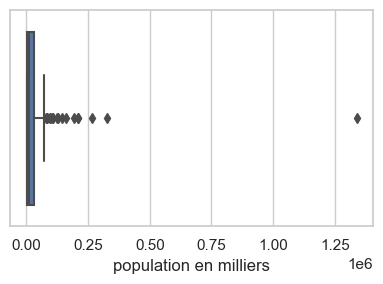

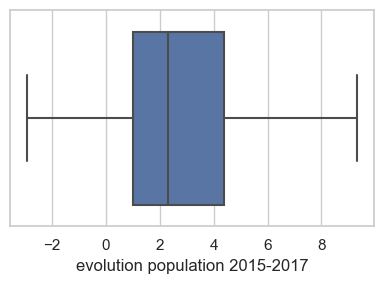

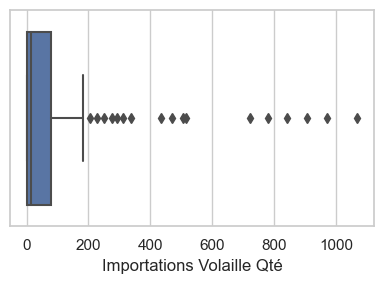

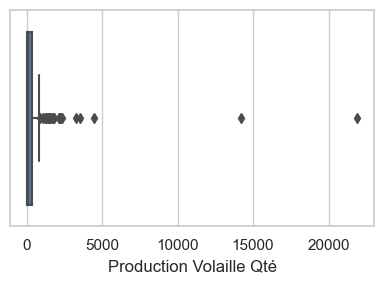

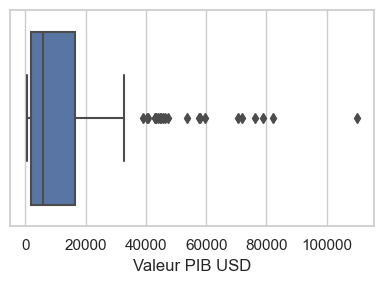

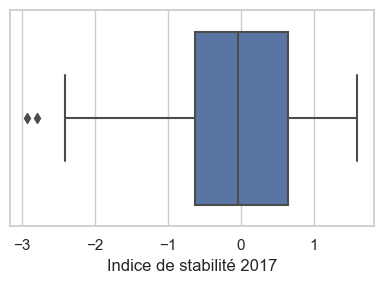

In [45]:
# Représentation en Boxplot des outliers

sns.set(style="whitegrid") 

fig, axs = plt.subplots( figsize=(4, 3))
sns.boxplot(x = 'population en milliers', data = df_final_1)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots( figsize=(4, 3))
sns.boxplot(x = 'evolution population 2015-2017', data = df_final_1)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots( figsize=(4, 3))
sns.boxplot(x = 'Importations Volaille Qté', data = df_final_1)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots( figsize=(4, 3))
sns.boxplot(x = 'Production Volaille Qté', data = df_final_1)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots( figsize=(4, 3))
sns.boxplot(x = 'Valeur PIB USD', data = df_final_1)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots( figsize=(4, 3))
sns.boxplot(x = 'Indice de stabilité 2017', data = df_final_1)
plt.tight_layout()
plt.show()


In [46]:
# Liste des outliers population
Q1= df_final_1['population en milliers'].quantile(0.25) 
Q3= df_final_1['population en milliers'].quantile(0.75)
IQR = Q3 - Q1
#valeur_min_population = round(Q1 - 1.5 * IQR,2)
valeur_max_population = round(1.5 * IQR + Q3,2)
liste_outliers_population=df_final_1.loc[df_final_1['population en milliers']>= valeur_max_population]
liste_outliers_population.nlargest(10,'population en milliers')

,Zone,Année,population en milliers,evolution population 2015-2017,Importations Volaille Qté,Production Volaille Qté,Valeur PIB USD,evolution pib 2015-2017,Indice de stabilité 2017
103,Inde,2017,1338676.785,2.18,0.0,3545.0,1937.924539,19.42,-0.76
65,États-Unis d'Amérique,2017,325084.756,1.31,123.0,21914.0,59468.227644,5.51,0.29
104,Indonésie,2017,264650.963,2.43,1.0,2301.0,3839.785075,15.57,-0.50
160,Pakistan,2017,207906.209,4.25,2.0,1281.0,1558.080077,10.67,-2.41
31,Brésil,2017,207833.823,1.64,3.0,14201.0,9896.717511,12.68,-0.47
152,Nigéria,2017,190873.244,5.37,0.0,201.0,1941.873934,-27.76,-2.00
19,Bangladesh,2017,159685.424,2.19,0.0,249.0,1785.836613,23.20,-1.26
67,Fédération de Russie,2017,145530.082,0.38,226.0,4444.0,10822.770083,14.83,-0.64
112,Japon,2017,127502.725,-0.38,1069.0,2215.0,38928.952604,11.45,1.11
139,Mexique,2017,124777.324,2.40,972.0,3249.0,9693.330262,-4.01,-0.80


In [47]:
# Liste des outliers Importations Volaille Qté
Q1= df_final_1['Importations Volaille Qté'].quantile(0.25) 
Q3= df_final_1['Importations Volaille Qté'].quantile(0.75)
IQR = Q3 - Q1
#valeur_min_Importations = round(Q1 - 1.5 * IQR,2)
valeur_max_Importations = round(1.5 * IQR + Q3,2)
liste_outliers_Importations=df_final_1.loc[df_final_1['Importations Volaille Qté']>= valeur_max_Importations]
liste_outliers_Importations.nlargest(10,'Importations Volaille Qté')


,Zone,Année,population en milliers,evolution population 2015-2017,Importations Volaille Qté,Production Volaille Qté,Valeur PIB USD,evolution pib 2015-2017,Indice de stabilité 2017
112,Japon,2017,127502.725,-0.38,1069.0,2215.0,38928.952604,11.45,1.11
139,Mexique,2017,124777.324,2.40,972.0,3249.0,9693.330262,-4.01,-0.80
41,Chine - RAS de Hong-Kong,2017,7306.322,1.67,907.0,24.0,45737.483211,9.39,0.83
4,Allemagne,2017,82658.409,1.06,842.0,1514.0,44670.222282,9.24,0.59
185,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2017,66727.461,1.32,779.0,1814.0,40568.470503,-9.63,0.39
10,Arabie saoudite,2017,33101.179,4.36,722.0,616.0,20910.482962,2.29,-0.64
1,Afrique du Sud,2017,57009.756,2.93,514.0,1667.0,6723.928582,8.43,-0.28
70,France,2017,64842.509,0.60,506.0,1750.0,40458.149878,5.88,0.28
106,Iraq,2017,37552.781,5.57,470.0,96.0,4725.193371,6.98,-2.31
59,Émirats arabes unis,2017,9487.203,2.42,433.0,48.0,43063.967477,3.71,0.62


In [48]:
# Liste des outliers Valeur PIB USD
Q1= df_final_1['Valeur PIB USD'].quantile(0.25) 
Q3= df_final_1['Valeur PIB USD'].quantile(0.75)
IQR = Q3 - Q1
#valeur_min_pib = round(Q1 - 1.5 * IQR,2)
valeur_max_pib = round(1.5 * IQR + Q3,2)
liste_outliers_pib=df_final_1.loc[df_final_1['Valeur PIB USD']>= valeur_max_pib]
liste_outliers_pib.nlargest(10,'Valeur PIB USD')


,Zone,Année,population en milliers,evolution population 2015-2017,Importations Volaille Qté,Production Volaille Qté,Valeur PIB USD,evolution pib 2015-2017,Indice de stabilité 2017
126,Luxembourg,2017,591.910,4.44,11.0,0.0,110203.008207,4.50,1.33
213,Suisse,2017,8455.804,1.92,51.0,91.0,82255.865969,-1.86,1.26
42,Chine - RAS de Macao,2017,622.585,3.40,23.0,3.0,78896.274749,7.75,1.43
154,Norvège,2017,5296.326,1.86,2.0,101.0,76125.721765,1.79,1.17
108,Islande,2017,334.393,1.26,2.0,10.0,71961.532039,36.00,1.35
107,Irlande,2017,4753.279,2.17,99.0,110.0,70673.120437,12.83,1.00
65,États-Unis d'Amérique,2017,325084.756,1.31,123.0,21914.0,59468.227644,5.51,0.29
54,Danemark,2017,5732.274,0.77,133.0,173.0,57888.203513,8.59,0.87
14,Australie,2017,24584.620,2.72,16.0,1269.0,57489.804356,9.88,0.90
212,Suède,2017,9904.896,1.43,84.0,157.0,53788.877499,4.89,0.98


In [49]:
# Liste des outliers Indice de stabilité 2017
Q1= df_final_1['Indice de stabilité 2017'].quantile(0.25) 
Q3= df_final_1['Indice de stabilité 2017'].quantile(0.75)
IQR = Q3 - Q1
valeur_min_indice = round(Q1 - 1.5 * IQR,2)
#valeur_max_indice = round(1.5 * IQR + Q3,2)
liste_outliers_indice = df_final_1.loc[df_final_1['Indice de stabilité 2017']>= valeur_min_indice]
liste_outliers_indice.nsmallest(10,'Indice de stabilité 2017')

,Zone,Année,population en milliers,evolution population 2015-2017,Importations Volaille Qté,Production Volaille Qté,Valeur PIB USD,evolution pib 2015-2017,Indice de stabilité 2017
160,Pakistan,2017,207906.209,4.25,2.0,1281.0,1558.080077,10.67,-2.41
106,Iraq,2017,37552.781,5.57,470.0,96.0,4725.193371,6.98,-2.31
175,République centrafricaine,2017,4596.023,2.29,4.0,7.0,414.740323,17.95,-2.01
152,Nigéria,2017,190873.244,5.37,0.0,201.0,1941.873934,-27.76,-2.00
209,Soudan,2017,40813.397,4.91,2.0,67.0,3000.817257,36.47,-1.98
132,Mali,2017,18512.430,6.16,1.0,48.0,795.682802,10.06,-1.91
228,Ukraine,2017,44487.709,-0.97,121.0,1211.0,2510.017662,24.03,-1.87
226,Turquie,2017,81116.450,3.29,3.0,2192.0,10464.007788,-3.57,-1.79
66,Éthiopie,2017,106399.924,5.52,1.0,14.0,709.761008,15.30,-1.68
121,Liban,2017,6819.373,4.39,13.0,64.0,8679.897422,11.24,-1.63


In [206]:
# Suppression de la colonne Année et exportation du dataframe final en csv
df_final_1_temp = df_final_1.drop(columns='Année')
df_final_1_temp1.to_excel('df_final.xlsx', index=False)

En examinant les outliers résultant des différents dataframes ci-dessus, on constate que nos données ne sont pas aberrantes. Elles reflètent simplement les disparités des indicateurs entre les différents pays dans le monde.